In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초

## 열에 있는 값을 행으로 내리는 방법  
- melt: 지정한 열의 데이터를 모두 행으로 내려주는 기능  
- 기본구조:  
pd.melt(df,id_vars=)  
id_vars : 행으로 내리면 안되는, 고정할 열  
var_nameL 위치를 변경한 열의 이름  
value_name: 위치를 변경한 '열의 데이터'를 저장한 열의 이름  




In [ ]:
import pandas as pd
df=pd.read_csv('pew.csv')
print(df)
df2=pd.melt(df,id_vars=['religion'],var_name='income',value_name='count')
df2

In [ ]:
billboard=pd.read_csv('billboard.csv')
print(billboard)
df3=pd.melt(billboard,id_vars=['year','artist','track','time','date.entered'],
            var_name='week',
            value_name='rating')

df3


## 열 분할 및 수집
ex.
11_홍길동  
17_강동원  
21_아이유  
앞 숫자는 학번, 뒤에는 이름  
이를 하나의 열이 아닌 학번, 이름이라는 2개의 열로 구분하는 것이 더 좋을 듯  
분할: 시리즈.str.split(기준)  
수집: 시리즈.str[인덱스]

In [ ]:
ebola=pd.read_csv('country_timeseries.csv')
ebola
df4=pd.melt(ebola,id_vars=['Date','Day'],var_name='a',value_name='value')

df5=df4['a'].str.split('_')
state=df5.str[0]
country=df5.str[1]
df4['State']=state
df4['Country']=country
del df4['a']
df4

## 행에 있는 값을 열로 올리는 방법  
- melt와는 반대로 행에 있는 값을 열로 올려서 새로운 열을 만드는 기능  
- 기본구조:  
df.pivot_table(  
    index=고정하고 싶은 열,  
    columns=열로 올리고싶은 열,  
    values= 새로 올라간 열이 가지게 될 값,  
    dropna=True/False
)  
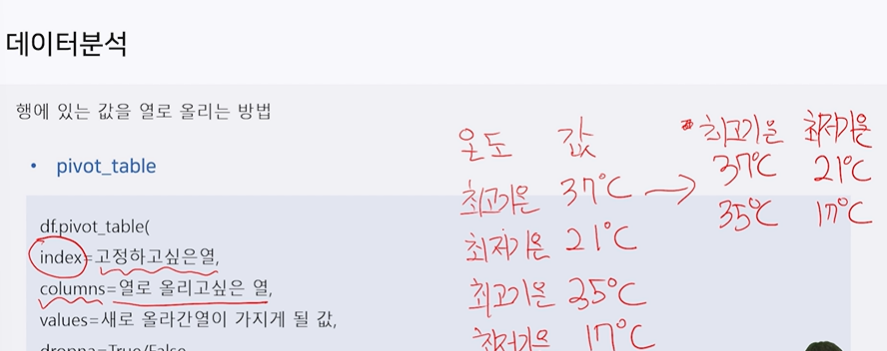  
- 인덱스 새롭게 다시 만들기  
df.reset_index()

In [ ]:
weather=pd.read_csv('weather.csv') #element : 최고, 최저 기온을 나타내는
weather

In [ ]:
weather2=pd.melt(weather,id_vars=['id','year','month','element'],var_name='day',value_name='temp')
weather2

In [ ]:
weather3=weather2.pivot_table(index=['id','year','month','day'],columns='element',values='temp',dropna=True)
weather3

In [ ]:
weather4=weather3.reset_index()

## 데이터에 순위를 매기는 방법(Rank)  
-rank : 특정 열의 값에 따라 순위를 매겨주는  
- 기본구조:  
df['열',rank(method=...),ascending=True/False]  
ascending=True : 오름차순  
- method  
average: 동점 관측치 간의 그룹 내 평균 순위 부여  
ex. 3등 2명 -> 3.5 등 -> 5등  
min: 동점 관측치 그룹 내 최소 순위 부여  
ex. 3등 2명 ->  3등 -> 5등  
max: 동점 관측치 그룹 내 최대 순위 부여  
ex. 3등 2명 ->  4등 -> 5등  
first: 동점 관측치 중 데이터 상에서 먼저 나타나는 관측치부터 순위부여   
ex. 3등 2명 ->  먼저 발견한 3등-> 3등, 나중에 발견한 3등은 4등 -> 5등  
dense: 최소값과 같으나 그룹간 순위가 1씩 증
ex. 3등 2명 ->  3등 -> 4등


In [ ]:
grade=pd.read_excel('성적 처리.xlsx',sheet_name='Sheet1') #엑셀파일을 불러올때는 sheet_name을 꼭 주의해서 확인
grade.groupby('반').mean() #반별 점수 확인
grade

In [ ]:
grade['총합']=grade.loc[:,'국어':].sum(axis=1) # 하나의 행의 총합을 구하기 위해선 열방향으로 더하기
grade['평균']=grade['총합']/5

In [ ]:
grade['순위']=grade['평균'].rank(method='average',ascending=False) #값이 커질수록 순위는 낮아져야 하기 때문에 -> 순위 값이 작을수록 순위는 좋은 것
grade
grade['순위']=grade['평균'].rank(method='min',ascending=False) #값이 커질수록 순위는 낮아져야 하기 때문에 -> 순위 값이 작을수록 순위는 좋은 것
grade

## 정규표현식-re 라이브러리
- 정규표현식 : 어떤 문자열에서 내가 원하는 패턴을 찾는 기능  
ex. 긴 문장에서 전화번호만 가져오는, 내가 원하는 표현만 가져오는 방법  
- 기본구조:  
import re  
re.findall(패턴, 문자)
- 메타문자 : +,(),[],/ 등 문자가 ㅡㄱ별한 용도로 사용되는 문자  
- [] : []사이의 문자들과 매치  
ex. [abc]라는 어떤 패턴을 찾고 싶다고 하면 'My name' 에서 [abc]에 하나라도 매치된다면 이 문장에서 'a'만 출력된다. [a-c]도 마찬가지  
- [0-9]: 0부터 9까지 모든 숫자 (어떤 문장에서 숫자만 찾겠다)

- [a-zA-Z]: 대문자, 소문자 상관없이 모든 영어 (어떤 문장에서 영어만 찾겠다) + 소문자만 찾고 싶으면 [a-z]  

- [가-힣]: 모든 한글  

- [0-9a-zA-Z가-힣]: 특수문자를 제외한 모든 문자들을 찾겠다.  

- 문자클래스  
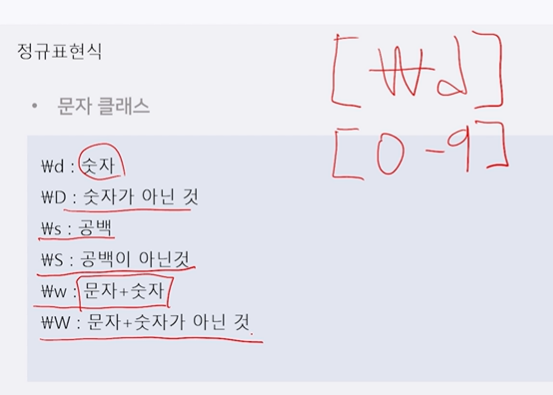
- 점(.) : \n을 제외한 모든 문자와 매치  
ex. [a.b] -> aab,a0b,a와 b사이에 어떤 것이 들어와도 상관 없음  
- 반복(*) : 0부터 무한대로 반복될 수 있다는 뜻  
ex. ca*t -> ct,caat,caaaat  
- 반복(+): 1개 이상부터 무한대로 반복될 수 있다.  
ex. ca+t -> cat,caat,caaaat  
- 반복{}: {n}: 반드시 n번 반복, {m,n} : m~n번 반복  
ex. [ca{3}t] -> caaat  
- ? : 있어도 되고, 없어도 된다는 의미  
ex. ab?c -> ac,abc  

In [ ]:
import re
f=open('코로나.txt','rt')
cor=f.read()
f.close()

print(cor)

re.findall('[가-힣]+',cor) #단어별로 뽑아낼 수 있다. 한개 이상으로 이루어진 단어들

re.findall('[가-힣]{2}',cor) #단어별로 뽑아낼 수 있다. 2개로 이루어진 단어들
re.findall('[가-힣]{2,}',cor) #단어별로 뽑아낼 수 있다. 2개이상 이루어진 단어들


In [ ]:
re.findall('코\w+19+',cor) #어떤 문자가 1개이상 존재하고, 19가 마지막에 붙어있는
re.findall('\d{3}만\d{4}',cor) #어떤 문자가 1개이상 존재하고, 19가 마지막에 붙어있는